In [1]:

from snake_game import SnakeGame
import tkinter as tk
import torch
from torch import nn
from torch import optim
from model_brain import *

epoch = 100


root = tk.Tk()
#game = SnakeGame(root)
Q_model = Brain()
target_model = Brain()
target_model.load_state_dict(Q_model.state_dict())
memory = ReplayMemory(5000)
gamma =  0.9
optimizer = torch.optim.Adam(Q_model.parameters(), lr=0.001)
loss_f = nn.MSELoss()

loss_set = []
score_set = []

for e in range(1, epoch + 1):
    game = SnakeGame(root)
    root.mainloop()
    r_loss = 0
    batch_count = 0
    while not game.game_over:
        game.update()
        state_tensor = game.board_tensor()
        Q_values = Q_model(state_tensor.unsqueeze(0))
        action = torch.max(Q_values) 
        reward = 0
        done = False

        if game.direction == "Up":
            game.change_direction('Up')
        elif game.direction == "Down":
            game.change_direction('Down')
        elif game.direction == "Left":
            game.change_direction('Left')
        elif game.direction == "Right":
            game.change_direction('Right')


        next_state_tensor = game.board_tensor()
        memory.push(state_tensor, action, reward, next_state_tensor, done)
        
        train_f = train_model(game,batch_count, Q_model, target_model, memory, optimizer, loss_f, gamma)
        if train_f:
            loss_b = train_f*32
            r_loss += loss_b
            
        batch_count += 1
        if batch_count >= 32:
            batch_count = 0

    loss_set.append(r_loss)
    score_set.append(game.move_snake())
    
    
        

TclError: can't invoke "wm" command: application has been destroyed

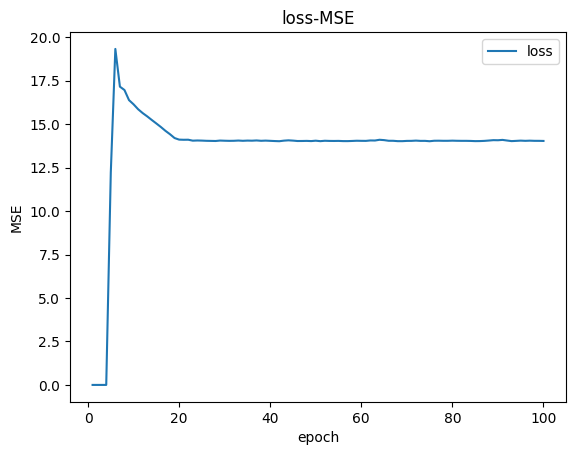

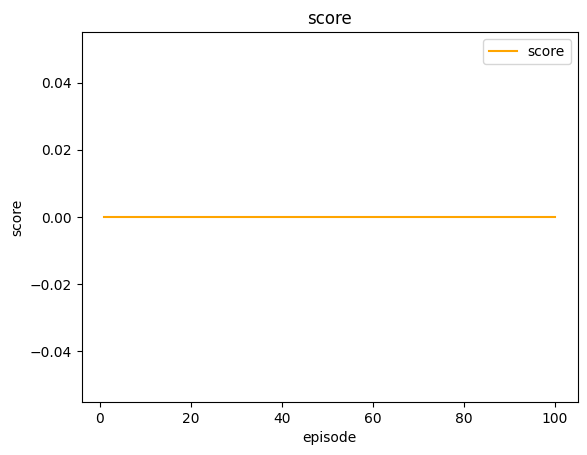

In [11]:

import matplotlib.pyplot as plt

epoch_x = [e for e in range(1, epoch + 1)]
loss_y = loss_set
score_y = score_set


plt.figure(1)
plt.plot(epoch_x, loss_y, label='loss')
plt.title('loss-MSE')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()

plt.figure(2)
plt.plot(epoch_x, score_y, label='score', color='orange')
plt.title('score')
plt.xlabel('episode')
plt.ylabel('score')
plt.legend()

plt.show()




In [4]:

import torch

from model_brain import Brain

x = torch.randn(1, 4)
print(x)
print(torch.max(x, dim = 1))


tensor([[-1.1977,  1.7835, -1.2377, -1.0978]])
torch.return_types.max(
values=tensor([1.7835]),
indices=tensor([1]))


In [1]:

import torch
a = torch.randn(2,2)
print(a)
print(a.unsqueeze(0))


tensor([[-1.2983, -0.5601],
        [ 0.6769,  0.4523]])
tensor([[[-1.2983, -0.5601],
         [ 0.6769,  0.4523]]])


In [1]:
import torch
a = (1,2)
a = torch.tensor(a)
print(a)

tensor([1, 2])
